In [33]:
import bioread
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [37]:
def plot_power_spectrum(data,fs):
    ps = np.abs(np.fft.fft(data))**2

    time_step = 1 / fs
    freqs = np.fft.fftfreq(data.size, time_step)
    idx = np.argsort(freqs)

    plt.plot(freqs[idx], ps[idx])
    plt.xlim(0,fs/2)

In [7]:
data = bioread.read_file(r'/Users/william/Desktop/RedRockets/The Red Rocket-L01')
emg = data.channels[0].data
integrated_emg = data.channels[1].data
time = data.channels[0].time_index

In [78]:
import pickle
pickle.dump([emg,integrated_emg],open(r'/Users/william/Desktop/emg_data.pkl','wb'))

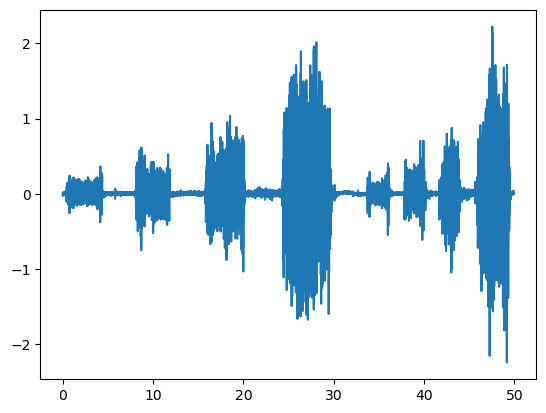

In [31]:
plt.plot(time,emg)

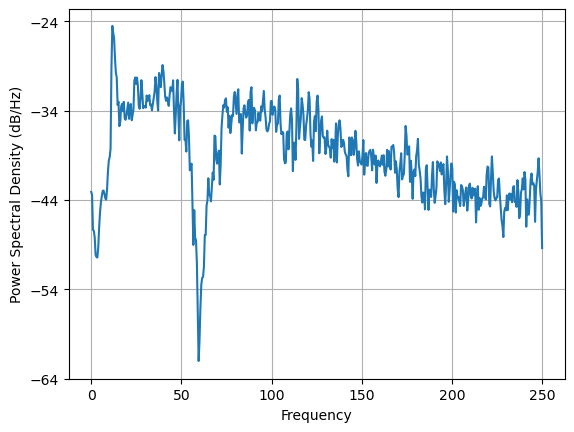

In [23]:
plt.psd(emg,1024,500);

In [24]:
from scipy import signal

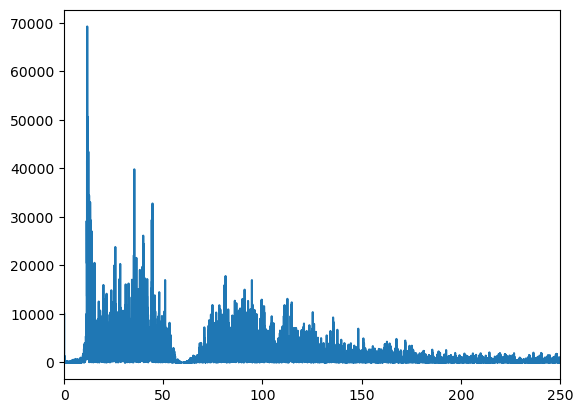

In [38]:
plot_power_spectrum(emg,500)

In [41]:
downsampled_size = round(np.size(emg)/500*120)
downsampled_data = signal.resample(emg,downsampled_size)

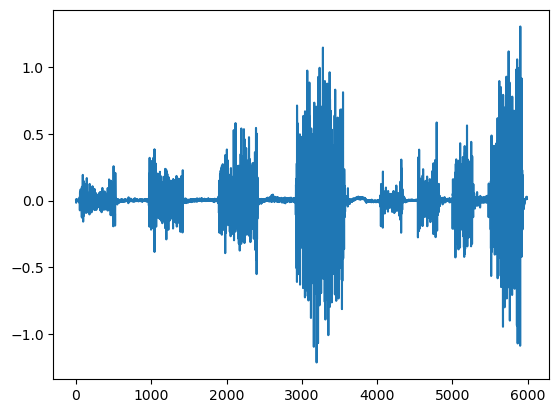

In [35]:
plt.plot(downsampled_data)

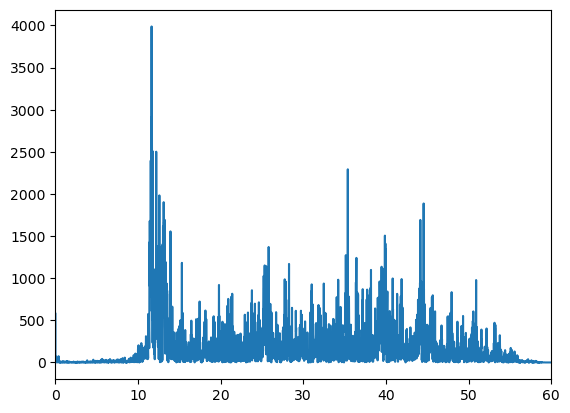

In [42]:
plot_power_spectrum(downsampled_data,120)

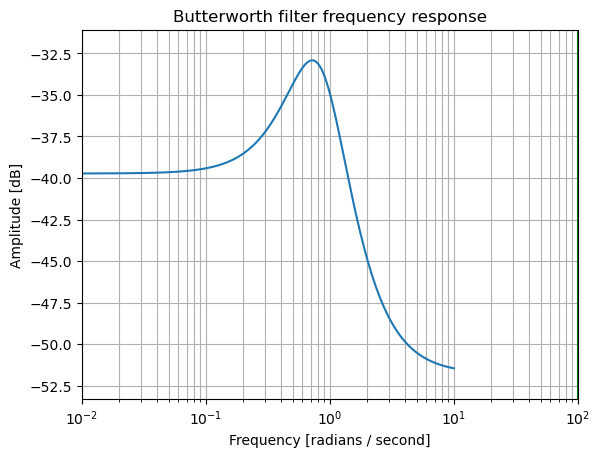

In [49]:
b, a = signal.butter(4, [10,20], 'band', analog=False,fs=120)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

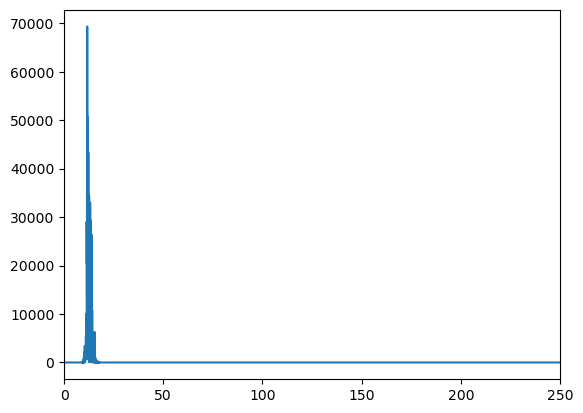

In [60]:
sos = signal.butter(4, [10,15], 'band', analog=False,fs=500,output='sos')
filtered = signal.sosfilt(sos, emg)
plot_power_spectrum(filtered,500)

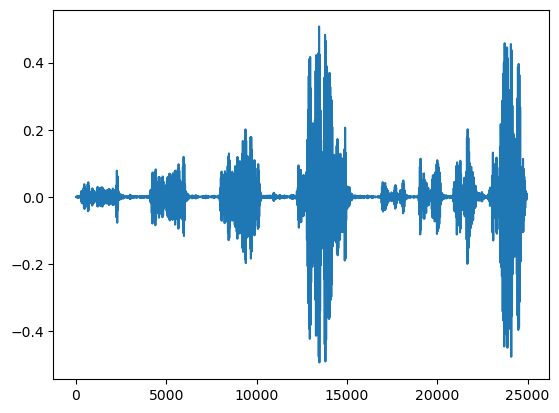

In [61]:
plt.plot(filtered)

In [62]:
downsampled_size = round(np.size(emg)/500*40)
summery_data = signal.resample(downsampled_data,downsampled_size)

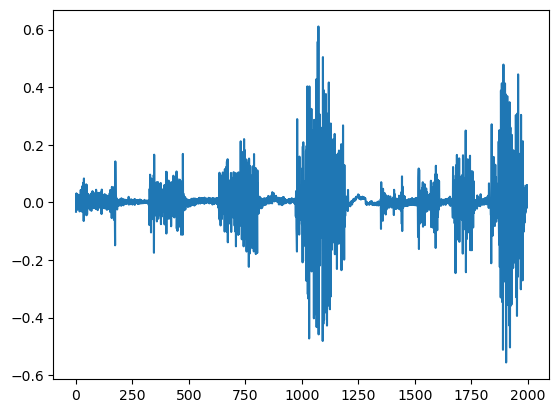

In [63]:
plt.plot(summery_data)

Text(0, 0.5, 'power')

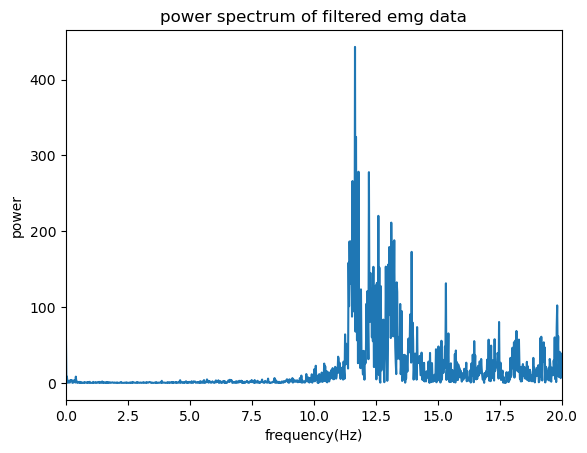

In [75]:
plot_power_spectrum(summery_data,40)
plt.title('power spectrum of filtered emg data')
plt.xlabel('frequency(Hz)')
plt.ylabel('power')

In [65]:
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

In [72]:
np.size(rms)

1978

Text(0, 0.5, 'rms')

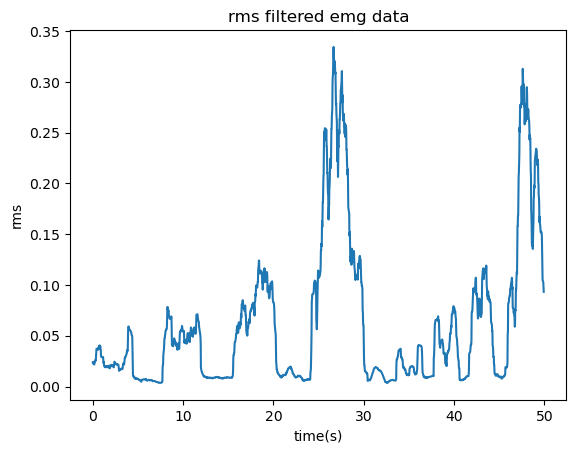

In [74]:
t = np.linspace(0,time[-1],1978)
rms = window_rms(summery_data,20)
plt.plot(t,rms)
plt.title('rms filtered emg data')
plt.xlabel('time(s)')
plt.ylabel('rms')